#### SPAM CLASSIFICATION MODEL


In [235]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv('Downloads/SPAM text message 20170820 - Data.csv')

In [4]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Converting category into labels 1,0 1->spam

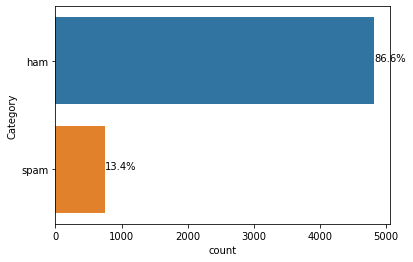

In [26]:

ax = sb.countplot(y=data['Category'])



total = len(data['Category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [27]:
data.shape

(5572, 2)

In [28]:
#converting the Category to 1,0
data['Category'] = data['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [30]:
#converting all the text to lower 

data['Message'] = data['Message'].str.lower()

In [41]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
data['length'] = data['Message'].str.len()

In [43]:
data

,Category,Message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,160
5568,0,will ü b going to esplanade fr home?,36
5569,0,"pity, * was in mood for that. so...any other s...",57
5570,0,the guy did some bitching but i acted like i'd...,125


In [216]:
data['Message'] = data['Message'].str.replace(r'\d','')

In [223]:
data['Message'] = data['Message'].str.replace(r'\d','')

In [230]:
def removePunctation(text):
    temp = ''.join([char for char in text if char not in string.punctuation])
    return temp

In [233]:
#remove punctuations
data['Message'] = data['Message'].apply(lambda x:removePunctation(x))

In [263]:
stopword = set(stopwords.words("english")+['ü','u','c','dun','n','v','eh','b','nah','nd','fr','£','r','im','ur','ure','doin','dont'])

In [265]:
#remove stop words 

data['Message'] = data['Message'].apply(lambda x : ' '.join([term for term in x.split() if term not in stopword]) )

In [266]:
data[:20]

,Category,Message,length
0,0,go jurong point crazy available bugis great wo...,111
1,0,ok lar joking wif oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,say early hor already say,49
4,0,think goes usf lives around though,61
5,1,freemsg hey darling weeks word back id like fu...,147
6,0,even brother like speak treat like aids patent,77
7,0,per request melle melle oru minnaminunginte nu...,160
8,1,winner valued network customer selected receiv...,157
9,1,mobile months entitled update latest colour mo...,154


In [267]:
data['clean text length'] = data['Message'].str.len()

In [268]:
data

,Category,Message,length,clean text length
0,0,go jurong point crazy available bugis great wo...,111,80
1,0,ok lar joking wif oni,29,21
2,1,free entry wkly comp win fa cup final tkts st ...,155,107
3,0,say early hor already say,49,25
4,0,think goes usf lives around though,61,34
...,...,...,...,...
5567,1,time tried contact pound prize claim easy call...,160,74
5568,0,going esplanade home,36,20
5569,0,pity mood soany suggestions,57,27
5570,0,guy bitching acted like id interested buying s...,125,82


In [273]:
from wordcloud import WordCloud

In [277]:
spam = data[data['Category'] == 1]['Message']

In [289]:
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(spam))

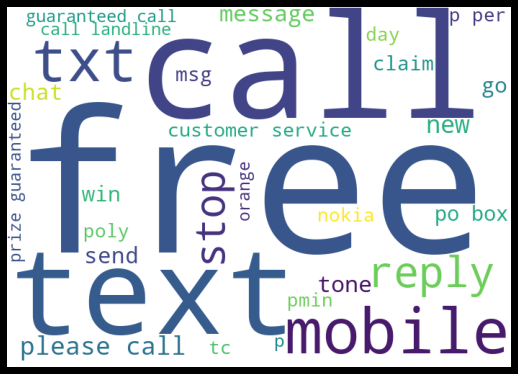

In [291]:
plt.figure(figsize=(7,5),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

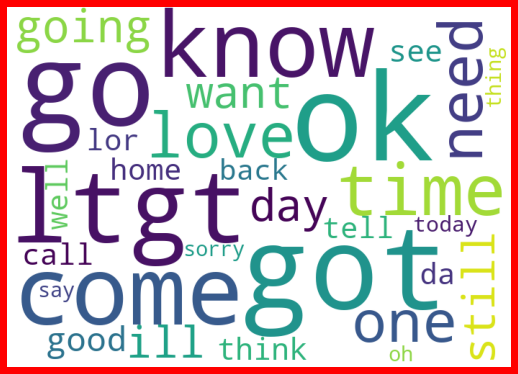

In [293]:
ham = data[data['Category'] == 0]['Message']

ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(ham))

plt.figure(figsize=(7,5),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [296]:
### Convert text into vectors
### VECTORIZATION

In [297]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [299]:
td_vec = TfidfVectorizer()
naive = MultinomialNB()
brnli = BernoulliNB()

features = td_vec.fit_transform(data['Message'])

In [307]:
x = features
y = data['Category']

X = pd.DataFrame(x.todense(),columns=td_vec.get_feature_names())


In [313]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.27)

In [314]:
naive.fit(x_train,y_train) 

MultinomialNB()

In [315]:
pred = naive.predict(x_test)

<AxesSubplot:>

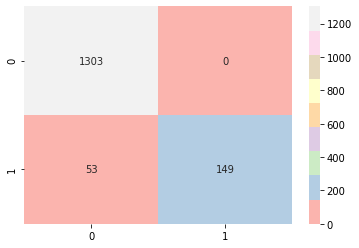

In [335]:
sb.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',cmap='Pastel1')

In [339]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1303
           1       1.00      0.74      0.85       202

    accuracy                           0.96      1505
   macro avg       0.98      0.87      0.91      1505
weighted avg       0.97      0.96      0.96      1505



In [344]:
from sklearn.model_selection import cross_val_score

In [350]:
print('Test Score    :     ',+accuracy_score(y_test,pred))

print('\n\nTrain Score    :     ',np.mean(cross_val_score(naive,x_train,y_train,cv=5,scoring='accuracy')))

Test Score    :      0.9647840531561461


Train Score    :      0.9503295647207086


In [351]:
import joblib

In [353]:
joblib.dump(naive,'naive.pk1')

['naive.pk1']